# Batch Gradient Descent

Batch Gradient Descent is a fundamental optimization algorithm used in machine learning to minimize the cost function. It updates model parameters by computing the gradient of the cost function with respect to all training examples simultaneously in each iteration. The algorithm:

- Uses entire dataset for each parameter update
- Updates weights using learning rate and computed gradients
- Iteratively minimizes the cost function
- Guarantees convergence to global minimum for convex optimization problems

The implementation includes:
- `learning_rate`: Step size for parameter updates
- `iterations`: Number of complete passes over the training data
- `theta`: Model parameters/weights

## Mathematical Foundation of Batch Gradient Descent

### Cost Function
For linear regression, we use the Mean Squared Error (MSE) cost function:
$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

where:
- $m$ is the number of training examples
- $h_\theta(x)$ is the hypothesis function: $h_\theta(x) = \theta^T x$
- $\theta$ represents the model parameters
- $x^{(i)}$ is the i-th input feature vector
- $y^{(i)}$ is the i-th target value

### Gradient Computation
The gradient of the cost function with respect to parameters $\theta$:
$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T(X\theta - y)$

### Parameter Update Rule
For each iteration, parameters are updated using:
$\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$

where:
- $\alpha$ is the learning rate
- $X$ is the feature matrix
- $y$ is the target vector

The algorithm converges when the gradient becomes very small or the maximum number of iterations is reached.

In [71]:
import numpy as np

class BatchGradientDescent:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.history = {"intercept": [], "coef": [], "loss": []}
        
    def fit(self, X_train, y_train):
        # Initialize coefficients and intercept
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # Calculate predictions
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            
            # Calculate gradients
            intercept_der = -2 * np.mean(y_train - y_hat)
            coef_der = -2 * np.dot((y_train - y_hat), X_train) / X_train.shape[0]
            
            # Update parameters
            self.intercept_ -= self.lr * intercept_der
            self.coef_ -= self.lr * coef_der
            
            # Save history for animation
            loss = np.mean((y_train - y_hat) ** 2)  # Mean Squared Error
            self.history["intercept"].append(self.intercept_)
            self.history["coef"].append(self.coef_.copy())  # Copy to avoid mutation
            self.history["loss"].append(loss)
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [2]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [47]:
X, y = load_diabetes(return_X_y=True)

In [48]:
print(X.shape,
y.shape)

(442, 10) (442,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


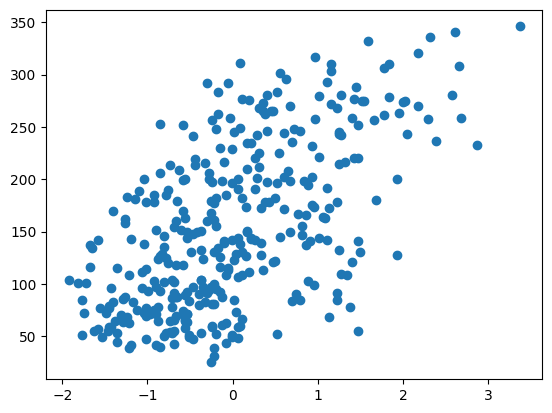

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 2], y_train)
plt.show()

In [98]:
model = BatchGradientDescent(learning_rate=0.1, epochs=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.4535184950636668


In [89]:
model.intercept_

153.73654387803174

In [90]:
model.coef_

array([  1.9384518 , -11.43732566,  26.26437636,  16.61371332,
       -10.19365695,  -2.11709445,  -7.47783315,   8.36042014,
        22.03740927,   2.59983829])

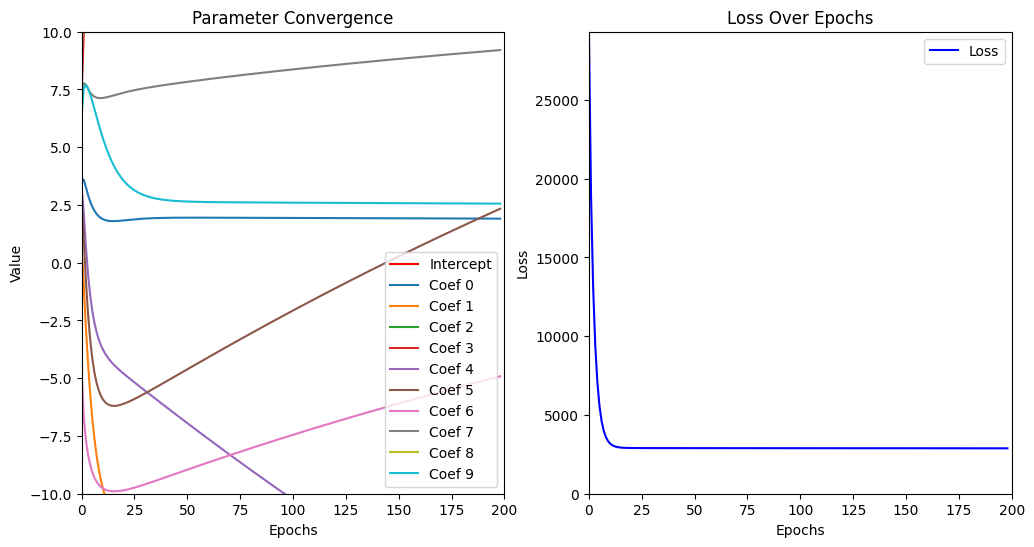

In [100]:
# Create and fit the model
model = BatchGradientDescent(learning_rate=0.1, epochs=200)
model.fit(X_train, y_train)

# Animation Setup
history = model.history
epochs = model.epochs

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
intercept_line, = ax[0].plot([], [], 'r-', label="Intercept")
coef_lines = [ax[0].plot([], [], label=f"Coef {i}")[0] for i in range(X_train.shape[1])]
loss_line, = ax[1].plot([], [], 'b-', label="Loss")

# Set up axes
ax[0].set_xlim(0, epochs)
ax[0].set_ylim(-10, 10)
ax[0].set_title("Parameter Convergence")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Value")
ax[0].legend()

ax[1].set_xlim(0, epochs)
ax[1].set_ylim(0, max(history["loss"]))
ax[1].set_title("Loss Over Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

def update(frame):
    # Update intercept
    intercept_line.set_data(range(frame), history["intercept"][:frame])
    
    # Update coefficients
    for i, coef_line in enumerate(coef_lines):
        coef_line.set_data(range(frame), [history["coef"][j][i] for j in range(frame)])
    
    # Update loss
    loss_line.set_data(range(frame), history["loss"][:frame])
    return [intercept_line] + coef_lines + [loss_line]

ani = FuncAnimation(fig, update, frames=epochs, interval=100, blit=True)
ani.save("bgd.gif", writer="pillow", fps=10)
plt.show()

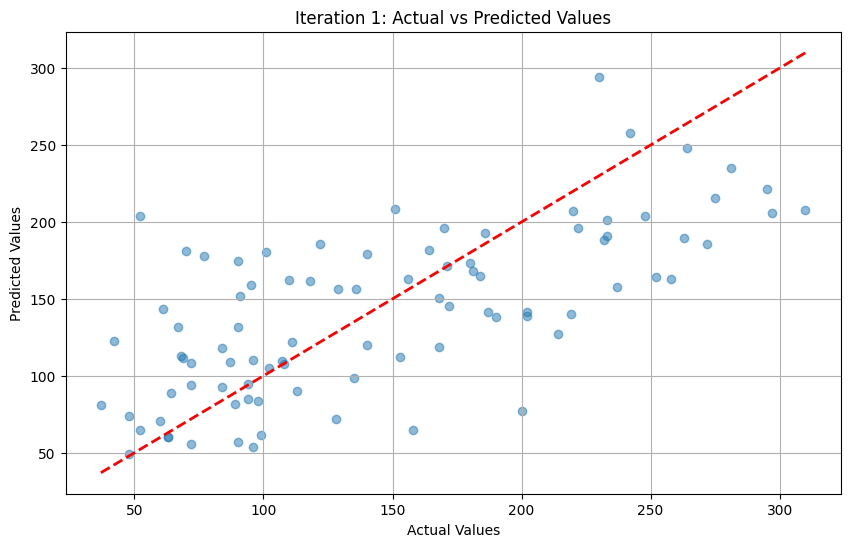

In [101]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML

# Create figure for animation
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize parameters
model = BatchGradientDescent(learning_rate=0.1, epochs=100)
model.intercept_ = 0
model.coef_ = np.ones(X_train.shape[1])

def animate(i):
    ax.clear()
    
    # Calculate predictions for current iteration
    y_pred = np.dot(X_test, model.coef_) + model.intercept_
    
    # Update parameters
    y_hat = np.dot(X_train, model.coef_) + model.intercept_
    intercept_der = -2 * np.mean(y_train - y_hat)
    coef_der = -2 * np.dot((y_train - y_hat), X_train) / X_train.shape[0]
    
    model.intercept_ = model.intercept_ - (model.lr * intercept_der)
    model.coef_ = model.coef_ - (model.lr * coef_der)
    
    # Plot actual vs predicted
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Iteration {i+1}: Actual vs Predicted Values')
    ax.grid(True)

# Create and display animation with more frames and faster interval
anim = FuncAnimation(fig, animate, frames=100, interval=100, repeat=False)
anim.save("bgd_pred.gif", writer="pillow", fps=10)
HTML(anim.to_jshtml())